In [3]:
#importing necessary packages and libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import time
from wordcloud import WordCloud
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error



In [4]:
#data description

df = pd.read_csv('Project 2_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
#for finding null values 

df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

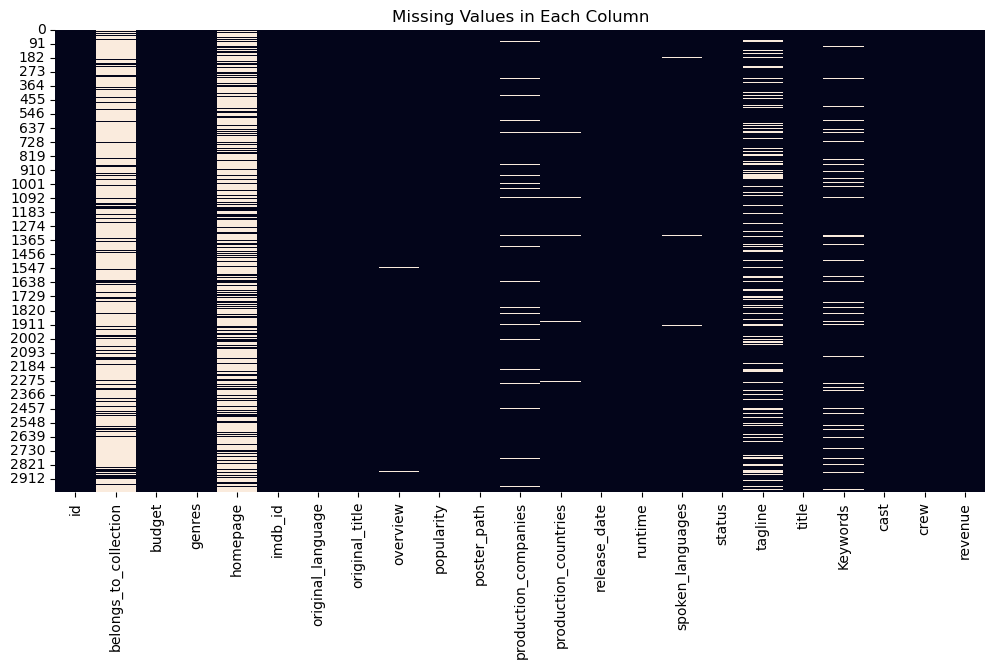

In [7]:
#heatmap for visualizng null values

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values in Each Column')
plt.show()

In [8]:
#checking for duplicate values

duplicates = df[df.duplicated(subset=['tagline'], keep=False)]

# Print the duplicate values
print("Duplicate values in the column:")
print(duplicates['tagline'])

Duplicate values in the column:
3       NaN
4       NaN
5       NaN
31      NaN
39      NaN
       ... 
2972    NaN
2981    NaN
2982    NaN
2988    NaN
2996    NaN
Name: tagline, Length: 602, dtype: object


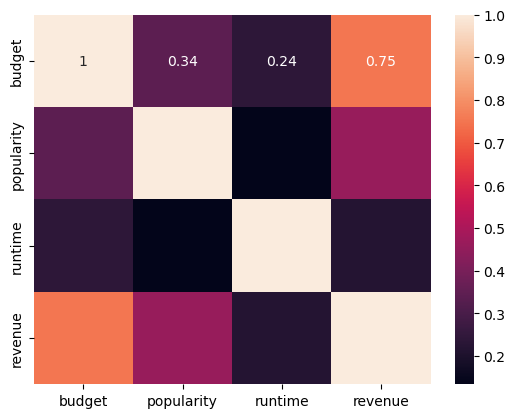

In [9]:
#checking for correlation

corr_matrix = df[['budget', 'popularity', 'runtime', 'revenue']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

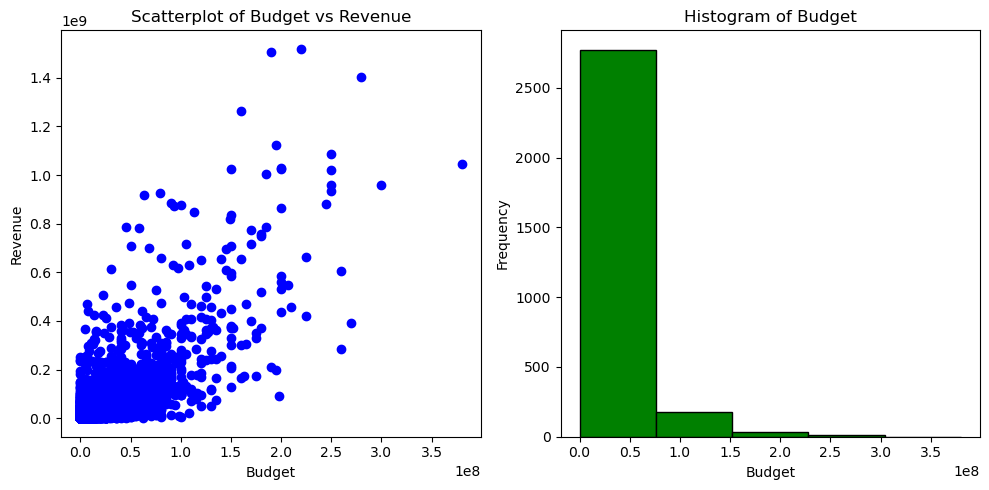

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Creating subplot for scatterplot
plt.scatter(df['budget'], df['revenue'], color='blue')
plt.title('Scatterplot of Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Histogram for 'budget'
plt.subplot(1, 2, 2)  # Creating subplot for histogram
plt.hist(df['budget'], bins=5, color='green', edgecolor='black')
plt.title('Histogram of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [11]:
#creating log transformation for reveune
df['log_budget'] = np.log1p(df['budget']) #we are not using log0 to avoid & and null value as there might be 0 value

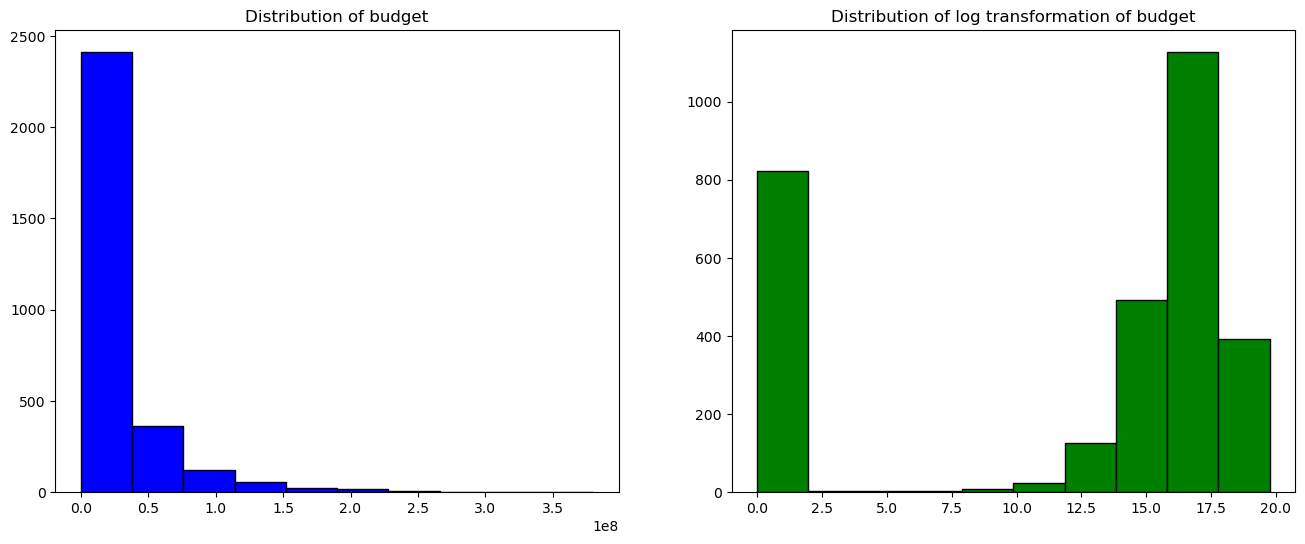

In [12]:
#comapring distribution of reveune and log budget side by side with histogram
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame has 'budget' and 'log_budget' columns

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first histogram for 'revenue'
ax[0].hist(df['budget'], color='blue', edgecolor='black')
ax[0].set_title('Distribution of budget')

# Plotting the second histogram for 'log_revenue'
ax[1].hist(df['log_budget'], color='green', edgecolor='black')
ax[1].set_title('Distribution of log transformation of budget')

# Display the plots
plt.show()

In [13]:
# Count the number of '0' values in the 'budget' column
zero_budget_count = (df['budget'] == 0).sum()

print("Number of '0' values in the budget column:", zero_budget_count)

Number of '0' values in the budget column: 812


In [14]:
#replacing the '0' values in the budget column with the mean of non-zero budget values

# Calculate the mean of non-zero budget values
mean_budget = df.loc[df['budget'] != 0, 'budget'].mean()

# Replace '0' values in the 'budget' column with the mean value
df.loc[df['budget'] == 0, 'budget'] = mean_budget

df.head()


C:\Users\adity\AppData\Local\Temp\ipykernel_35296\2816884658.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30893054.081352834' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['budget'] == 0, 'budget'] = mean_budget


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,log_budget
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1.400000e+07,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",4.000000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390
2,3,NaN,3.300000e+06,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433
3,4,NaN,1.200000e+06,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833
4,5,NaN,3.089305e+07,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.000000


In [15]:
# Count the number of '0' values in the 'budget' column
zero_budget_count = (df['budget'] == 0).sum()

print("Number of '0' values in the budget column:", zero_budget_count)

Number of '0' values in the budget column: 0


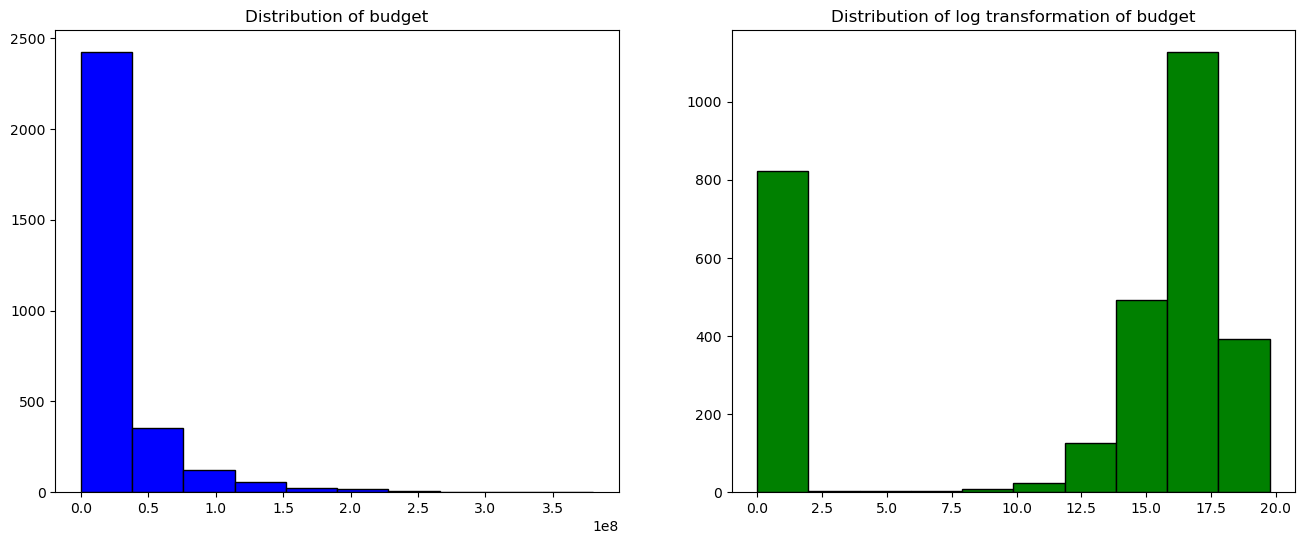

In [16]:
#comapring distribution of reveune and log budget side by side with histogram
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame has 'budget' and 'log_budget' columns

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first histogram for 'revenue'
ax[0].hist(df['budget'], color='blue', edgecolor='black')
ax[0].set_title('Distribution of budget')

# Plotting the second histogram for 'log_revenue'
ax[1].hist(df['log_budget'], color='green', edgecolor='black')
ax[1].set_title('Distribution of log transformation of budget')

# Display the plots
plt.show()

In [17]:
#creating log transformation for reveune
df['log_revenue'] = np.log1p(df['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value

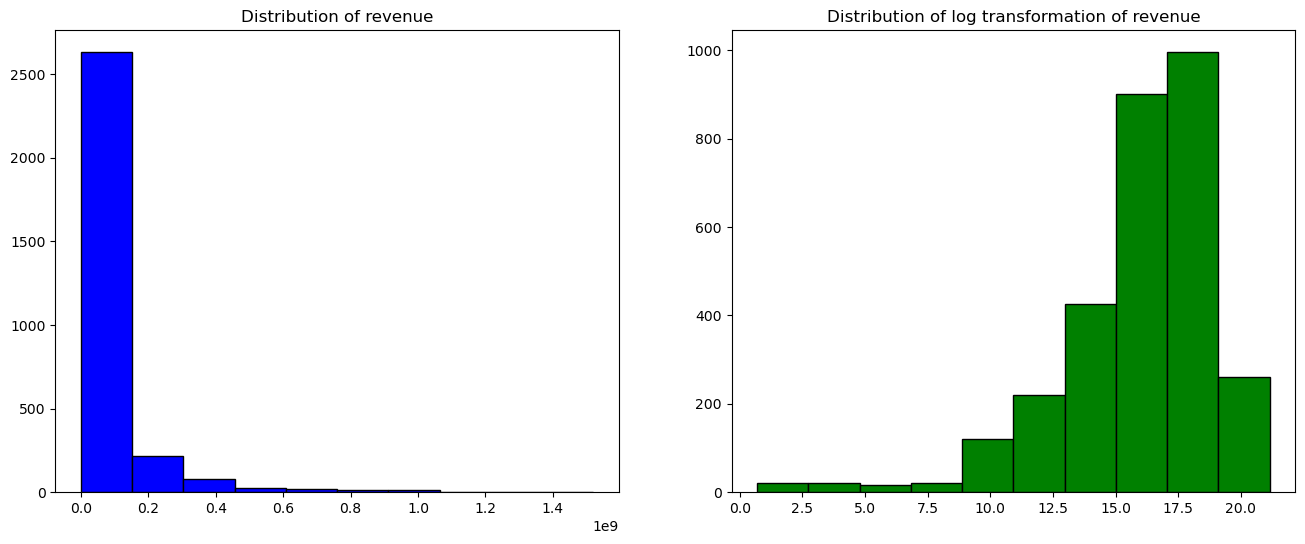

In [18]:
#comapring distribution of reveune and log revune side by side with histogram
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame has 'revenue' and 'log_revenue' columns

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first histogram for 'revenue'
ax[0].hist(df['revenue'], color='blue', edgecolor='black')
ax[0].set_title('Distribution of revenue')

# Plotting the second histogram for 'log_revenue'
ax[1].hist(df['log_revenue'], color='green', edgecolor='black')
ax[1].set_title('Distribution of log transformation of revenue')

# Display the plots
plt.show()

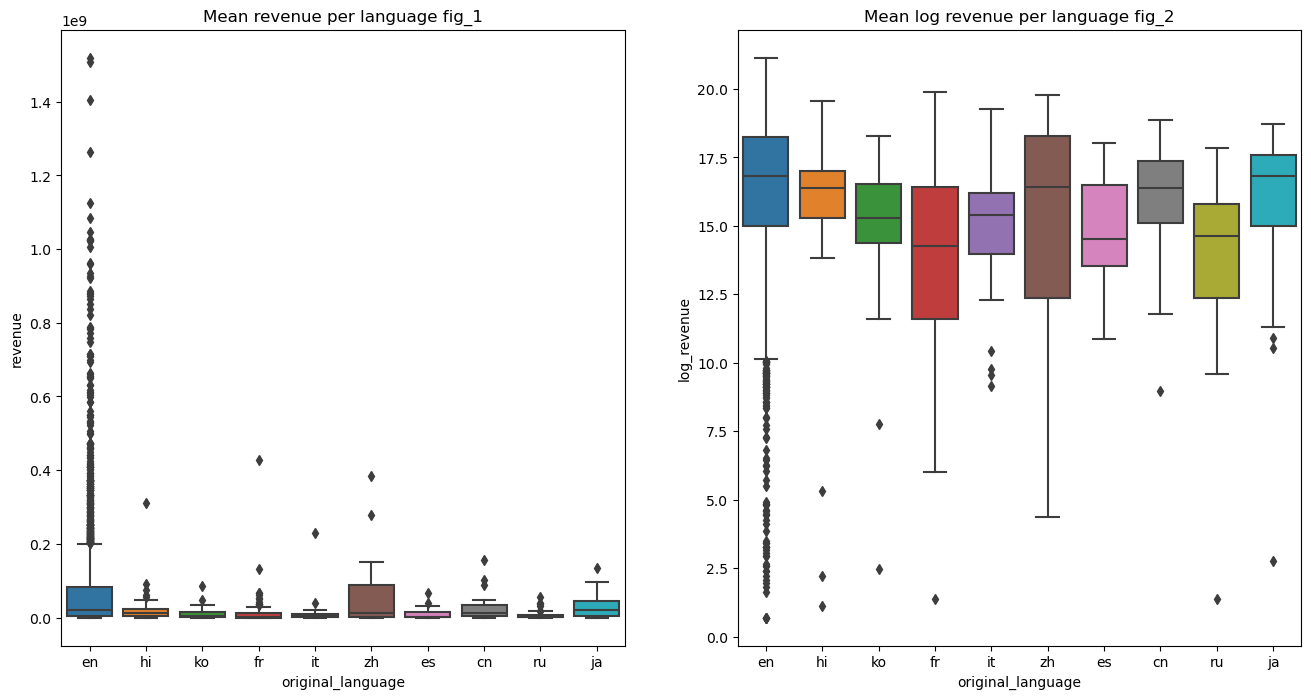

In [19]:
#we will be using blox pot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language fig_1');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language fig_2');

lets explore how the revenue is affected by something like the year the movie is released.

In [20]:
# Split release_date into day, month, and year
df[['release_month', 'release_day', 'release_year']] = df['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)

# Adjust the year
df.loc[(df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
df.loc[(df['release_year'] > 19) & (df['release_year'] < 100), "release_year"] += 1900

# Reconstruct the release_date column with the corrected year
df['corrected_release_date'] = df['release_month'].astype(str).str.zfill(2) + '/' + df['release_day'].astype(str).str.zfill(2) + '/' + df['release_year'].astype(str)

# Convert corrected_release_date to datetime
releaseDate = pd.to_datetime(df['corrected_release_date'], errors='coerce')

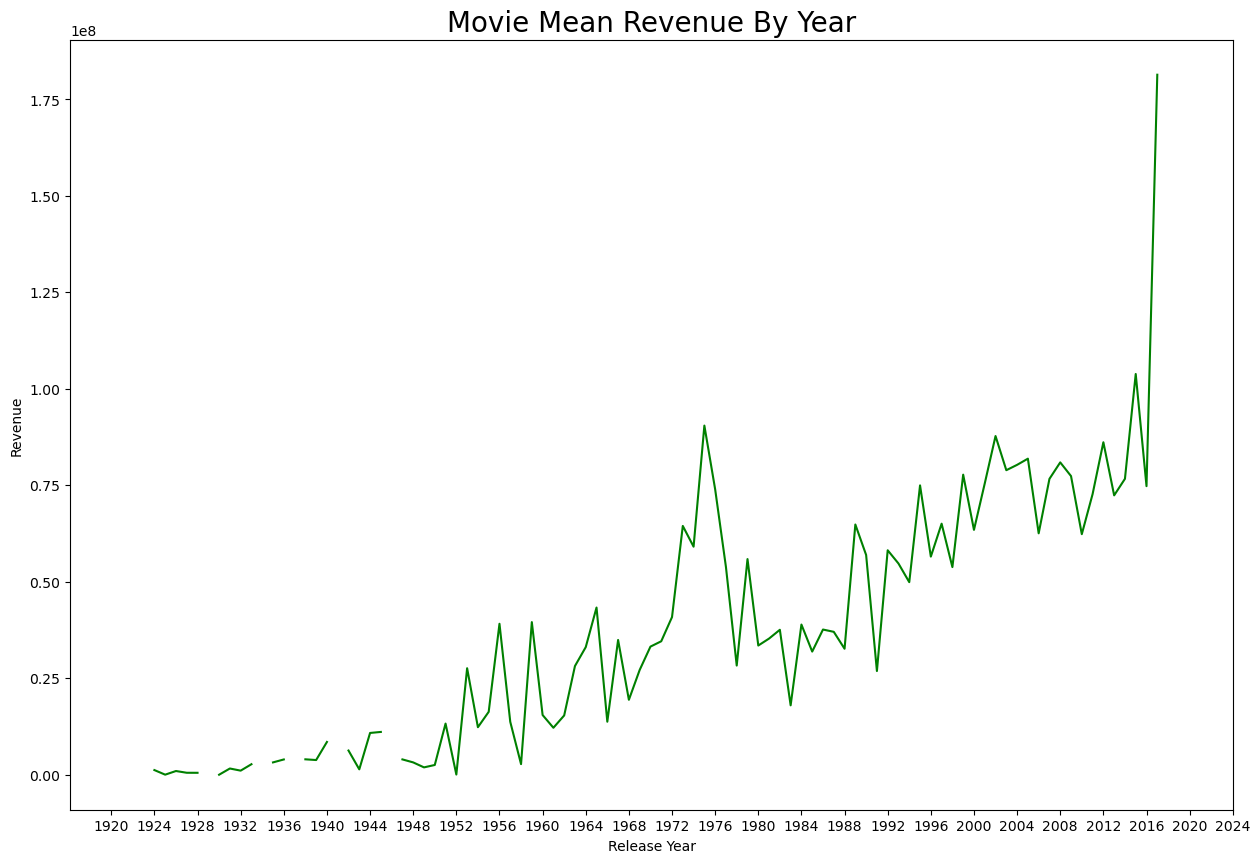

In [21]:
#checking for the effect of time(release_year) on mean revenue

df['meanRevenueByYear'] = df.groupby("release_year")["revenue"].aggregate('mean')
df['meanRevenueByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2028,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

This shows how the release year may be a significant influence on revenue and be useful when dfing the model.

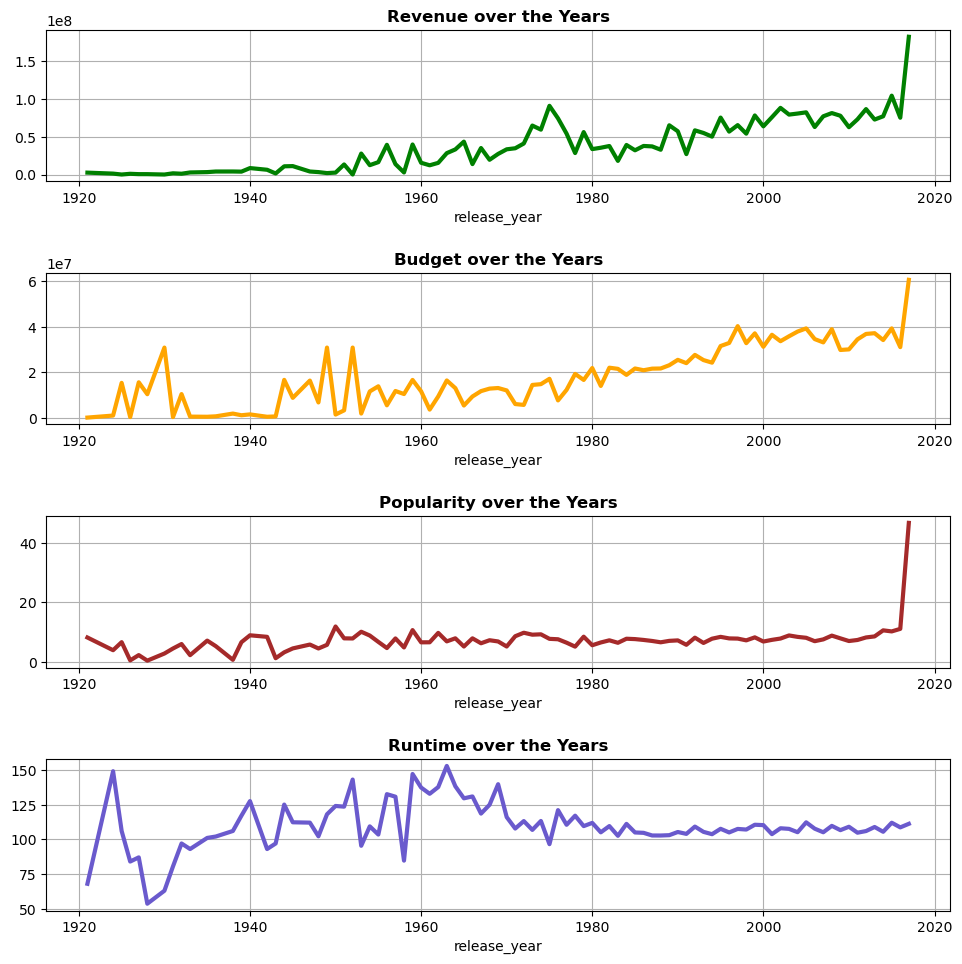

In [22]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

df.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

df.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

df.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

df.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

In [23]:
#dropping null values in genre column

df.dropna(subset=['genres'], inplace=True)

In [24]:
# Define a function to extract genre names
def extract_genre_names(genres_str):
    genres = ast.literal_eval(genres_str)  # Convert string representation to list of dictionaries
    return [genre['name'] for genre in genres]

# Apply the function to create a new column 'genres_names'
df['genres_names'] = df['genres'].apply(extract_genre_names)

# If you want to join the list of genre names into a single string
df['genres_names'] = df['genres_names'].apply(lambda x: ', '.join(x))


# Print the head of the DataFrame with the new column
df.head()



,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,log_budget,log_revenue,release_month,release_day,release_year,corrected_release_date,meanRevenueByYear,genres_names
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1.400000e+07,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,16.326300,2,20,2015,02/20/2015,NaN,Comedy
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",4.000000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,18.370959,8,6,2004,08/06/2004,NaN,"Comedy, Drama, Family, Romance"
2,3,NaN,3.300000e+06,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,16.387512,10,10,2014,10/10/2014,NaN,Drama
3,4,NaN,1.200000e+06,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,16.588099,3,9,2012,03/09/2012,NaN,"Thriller, Drama"
4,5,NaN,3.089305e+07,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.000000,15.182615,2,5,2009,02/05/2009,NaN,"Action, Thriller"


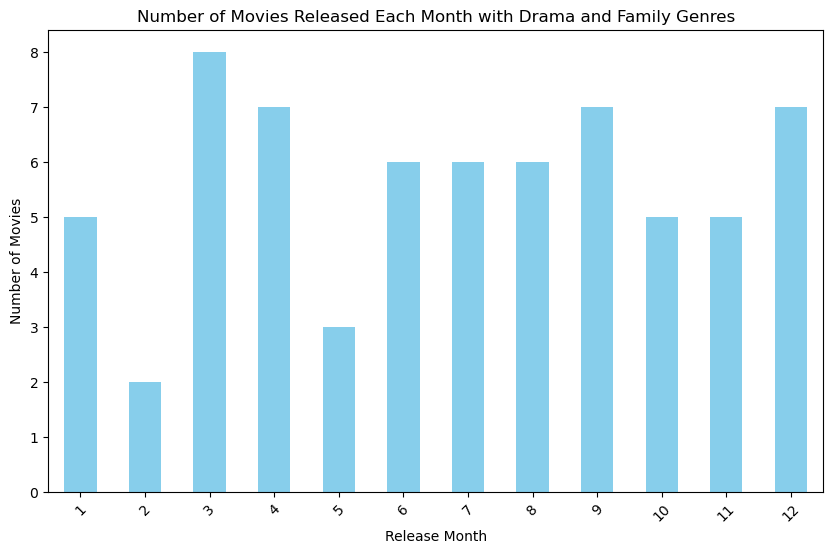

In [25]:
# Function to count movies with Drama and Family genres in each month
def count_genre_movies(genres_str, genre1, genre2):
    genres = genres_str.split(', ')
    if genre1 in genres and genre2 in genres:
        return 1
    else:
        return 0

# Apply the function to create a new column 'genre_combination'
df['Drama_Family'] = df['genres_names'].apply(lambda x: count_genre_movies(x, 'Drama', 'Family'))

# Group by release month and calculate the sum of movies with Drama and Family genres
monthly_counts = df.groupby('release_month')['Drama_Family'].sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Month with Drama and Family Genres')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

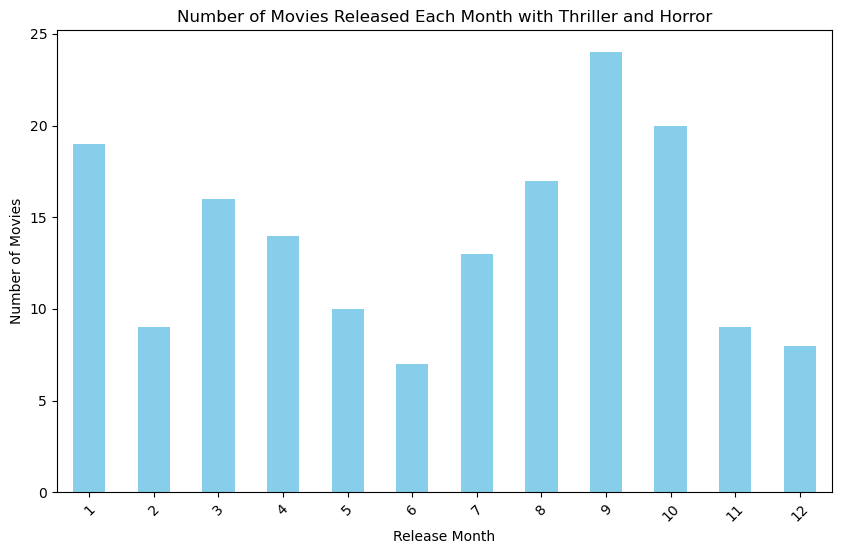

In [26]:
# Function to count movies with Thriller and Horror genres in each month
def count_genre_movies(genres_str, genre1, genre2):
    genres = genres_str.split(', ')
    if genre1 in genres and genre2 in genres:
        return 1
    else:
        return 0

# Apply the function to create a new column 'genre_combination'
df['Thriller_Horror'] = df['genres_names'].apply(lambda x: count_genre_movies(x, 'Thriller', 'Horror'))

# Group by release month and calculate the sum of movies with Thriller and Horror genres
monthly_counts = df.groupby('release_month')['Thriller_Horror'].sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Month with Thriller and Horror')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

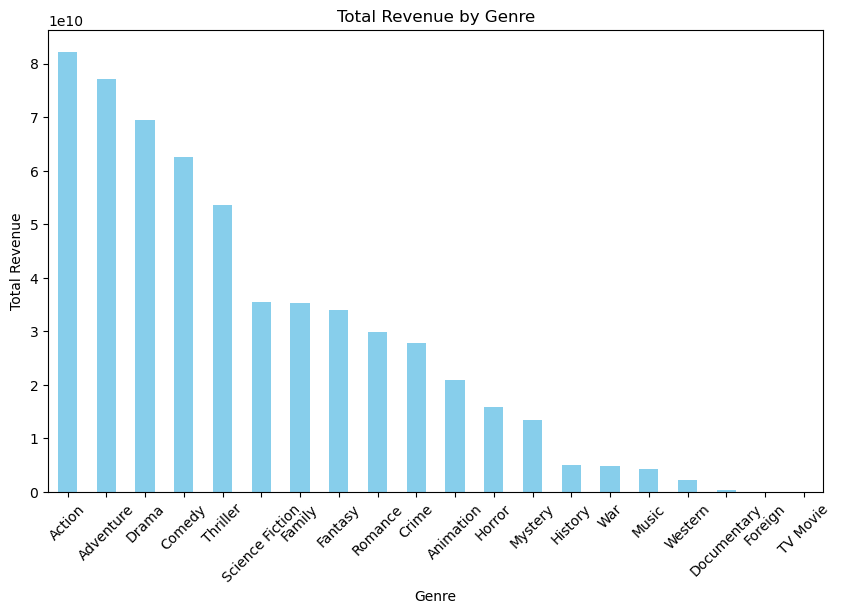

In [27]:
genres_df = df['genres_names'].str.split(', ', expand=True)

# Concatenate the 'revenue' column with the genres DataFrame
genres_df['revenue'] = df['revenue']

# Melt the DataFrame to have one row per genre per movie
melted_df = pd.melt(genres_df, id_vars=['revenue'], value_vars=[0, 1, 2, 3, 4], value_name='genre')

# Drop NaN values in the 'genre' column
melted_df.dropna(subset=['genre'], inplace=True)

# Group by genre and calculate the total revenue for each genre
genre_revenue = melted_df.groupby('genre')['revenue'].sum().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
genre_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.dropna(subset=['production_companies'], inplace=True)

In [29]:
df.dropna(subset=['production_countries'], inplace=True)

In [30]:
# Define a function to extract production company names
def extract_comp_names(prod_comp_str):
    production_companies = ast.literal_eval(prod_comp_str)  # Convert string representation to list of dictionaries
    return [prod['name'] for prod in production_companies]

# Apply the function to create a new column 'comp_names'
df['comp_names'] = df['production_companies'].apply(extract_comp_names)

# If you want to join the list of production company names into a single string
df['comp_names'] = df['comp_names'].apply(lambda x: ', '.join(x))


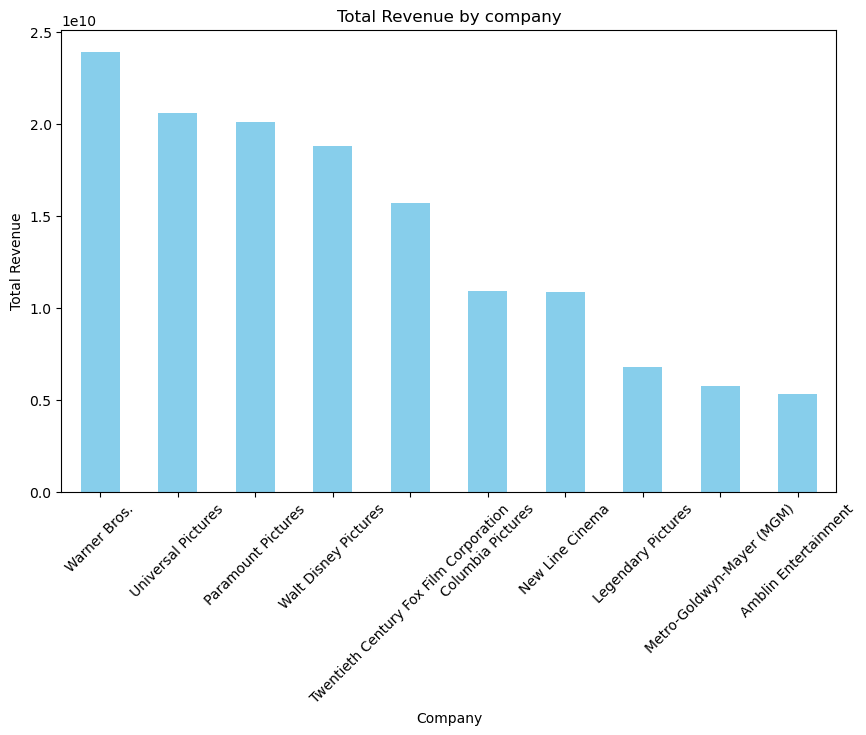

In [31]:
comp_df = df['comp_names'].str.split(', ', expand=True)

# Concatenate the 'revenue' column with the production_companies DataFrame
comp_df['revenue'] = df['revenue']

# Melt the DataFrame to have one row per company per movie
melted_df_2 = pd.melt(comp_df, id_vars=['revenue'], value_vars=[0, 1, 2, 3, 4], value_name='comp')

# Drop NaN values in the 'comp' column
melted_df_2.dropna(subset=['comp'], inplace=True)

# Group by comp and calculate the total revenue for each genre
comp_revenue = melted_df_2.groupby('comp')['revenue'].sum().sort_values(ascending=False)

top10_comp = comp_revenue.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top10_comp.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by company')
plt.xlabel('Company')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Define a function to extract country names
def extract_country_names(prod_country_str):
    production_countries = ast.literal_eval(prod_country_str)  # Convert string representation to list of dictionaries
    return [prod['name'] for prod in production_countries]

# Apply the function to create a new column 'country_names'
df['country_names'] = df['production_countries'].apply(extract_country_names)

# If you want to join the list of country names into a single string
df['country_names'] = df['country_names'].apply(lambda x: ', '.join(x))


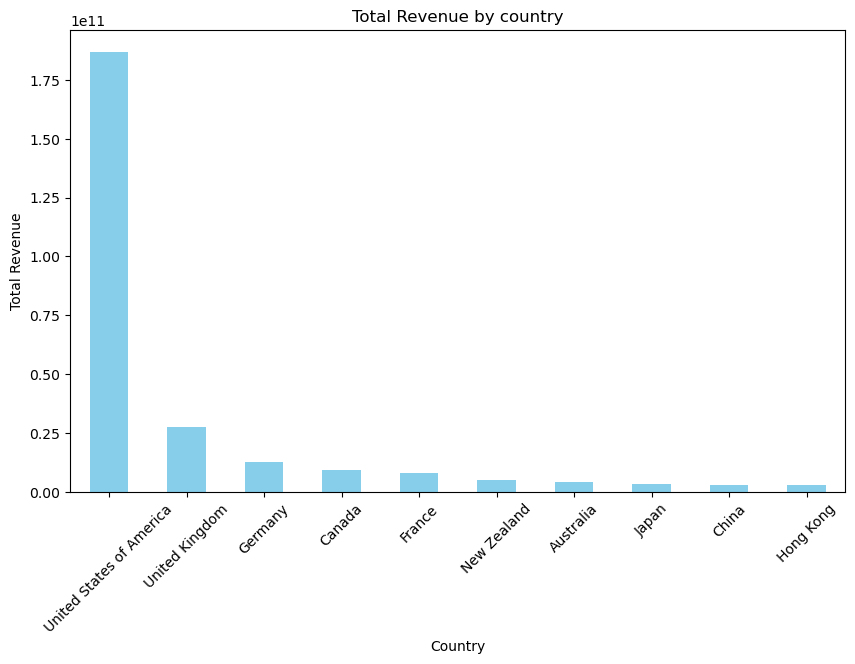

In [33]:
ctr_df = df['country_names'].str.split(', ', expand=True)

# Concatenate the 'revenue' column with the production_countries DataFrame
ctr_df['revenue'] = df['revenue']

# Melt the DataFrame to have one row per country per movie
melted_df_3 = pd.melt(ctr_df, id_vars=['revenue'], value_vars=[0, 1, 2, 3, 4], value_name='ctr')

# Drop NaN values in the 'ctr' column
melted_df_3.dropna(subset=['ctr'], inplace=True)

# Group by ctr and calculate the total revenue for each genre
ctr_revenue = melted_df_3.groupby('ctr')['revenue'].sum().sort_values(ascending=False)

top10_ctr = ctr_revenue.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top10_ctr.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [34]:
df['en_or_not'] = (df['original_language'] == 'en').astype(int)


In [35]:
top_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure']

# Create the 'Top_Genres' dummy variable
df['Top_Genres'] = df['genres_names'].apply(lambda x: 1 if any(genre in x.split(', ') for genre in top_genres) else 0) 

In [36]:
top_prod_comp = ['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures','Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema','Legendary Pictures','Walt Disney Pictures','Amblin Entertainment']

# Create the 'Top_prod_comp' dummy variable
df['Top_prod_comp'] = df['comp_names'].apply(lambda x: 1 if any(comp in x.split(', ') for comp in top_prod_comp) else 0) 


In [37]:

top_countries = ['United States of America','United Kingdom']

# Create the 'Top_Countries' dummy variable
df['Top_Countries'] = df['country_names'].apply(lambda x: 1 if any(c in x.split(', ') for c in top_countries) else 0) 



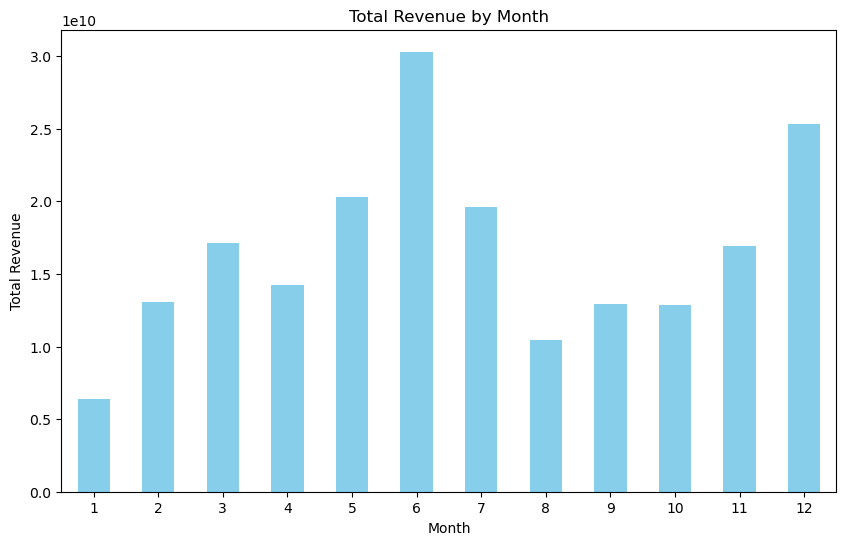

In [38]:
monthly_revenue = df.groupby('release_month')['revenue'].sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

In [39]:
top_months = ['5','6','7','11','12']
#Create dummy variables "Top_months"
df['Top_months'] = df['release_month'].apply(lambda x: 1 if x in top_months else 0)


In [40]:
df.dropna(subset=['Keywords'], inplace=True)


In [41]:
# Define a function to extract keywrord names
def extract_keyword_names(keyword_str):
    Keywords = ast.literal_eval(keyword_str)  # Convert string representation to list of dictionaries
    return [keyword['name'] for keyword in Keywords]

# Apply the function to create a new column 'keyword_names'
df['keyword_names'] = df['Keywords'].apply(extract_genre_names)

# If you want to join the list of keyword names into a single string
df['keyword_names'] = df['keyword_names'].apply(lambda x: ', '.join(x))


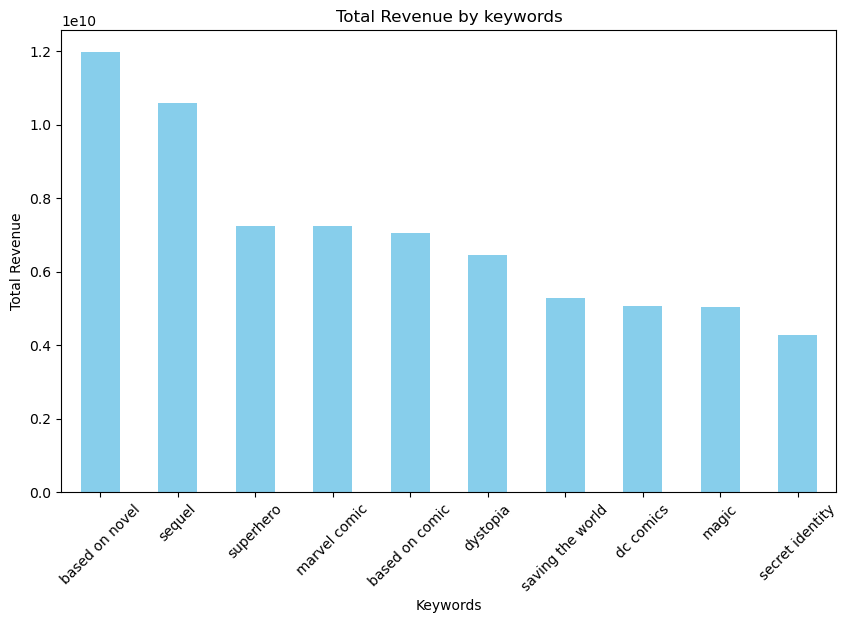

In [42]:
key_df = df['keyword_names'].str.split(', ', expand=True)

# Concatenate the 'revenue' column with the Keywords DataFrame
key_df['revenue'] = df['revenue']

# Melt the DataFrame to have one row per keyword per movie
melted_df_4 = pd.melt(key_df, id_vars=['revenue'], value_vars=[0, 1, 2, 3, 4], value_name='key')

# Drop NaN values in the 'key' column
melted_df_4.dropna(subset=['key'], inplace=True)

# Group by key and calculate the total revenue for each keyword
keywords_revenue = melted_df_4.groupby('key')['revenue'].sum().sort_values(ascending=False)

top10_keywords = keywords_revenue.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top10_keywords.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by keywords')
plt.xlabel('Keywords')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [43]:
top_keywords = ['based on novel', 'sequel', 'superhero', 'marvel comic', 'based on comic', 'dystopia', 'saving the world', 'dc comics', 'magic', 'secret identity']

# Create the 'Top_keywords' dummy variable
df['Top_keywords'] = df['keyword_names'].apply(lambda x: 1 if any(c in x.split(', ') for c in top_keywords) else 0) 

df.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Thriller_Horror,comp_names,country_names,en_or_not,Top_Genres,Top_prod_comp,Top_Countries,Top_months,keyword_names,Top_keywords
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1.400000e+07,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,"Paramount Pictures, United Artists, Metro-Gold...",United States of America,1,1,1,1,0,"time travel, sequel, hot tub, duringcreditssti...",1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",4.000000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,Walt Disney Pictures,United States of America,1,1,1,1,0,"coronation, duty, marriage, falling in love",0
2,3,NaN,3.300000e+06,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,"Bold Films, Blumhouse Productions, Right of Wa...",United States of America,1,1,0,1,0,"jazz, obsession, conservatory, music teacher, ...",0
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",3.089305e+07,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,0,"Walt Disney Pictures, Jim Henson Productions, ...",United States of America,1,1,1,1,0,"island, pirate gang, puppet, treasure hunt",0
9,10,NaN,6.000000e+06,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,...,0,Castle Rock Entertainment,United States of America,1,1,0,1,0,"mockumentary, folk singer",0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2628 non-null   int64  
 1   belongs_to_collection   566 non-null    object 
 2   budget                  2628 non-null   float64
 3   genres                  2628 non-null   object 
 4   homepage                858 non-null    object 
 5   imdb_id                 2628 non-null   object 
 6   original_language       2628 non-null   object 
 7   original_title          2628 non-null   object 
 8   overview                2624 non-null   object 
 9   popularity              2628 non-null   float64
 10  poster_path             2627 non-null   object 
 11  production_companies    2628 non-null   object 
 12  production_countries    2628 non-null   object 
 13  release_date            2628 non-null   object 
 14  runtime                 2627 non-null   float

In [45]:
# Selecting the specific columns
data = df[['log_budget', 'popularity', 'runtime', 'release_year', 'en_or_not', 'Top_Genres', 'Top_prod_comp', 'Top_Countries','log_revenue','Top_keywords','Top_months']]


In [46]:
data = data.dropna()  # Drop any rows with missing values


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   log_budget     2627 non-null   float64
 1   popularity     2627 non-null   float64
 2   runtime        2627 non-null   float64
 3   release_year   2627 non-null   int32  
 4   en_or_not      2627 non-null   int32  
 5   Top_Genres     2627 non-null   int64  
 6   Top_prod_comp  2627 non-null   int64  
 7   Top_Countries  2627 non-null   int64  
 8   log_revenue    2627 non-null   float64
 9   Top_keywords   2627 non-null   int64  
 10  Top_months     2627 non-null   int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 225.8 KB


In [48]:
X = data[['log_budget','popularity', 'runtime', 'release_year', 'en_or_not', 'Top_Genres', 'Top_prod_comp', 'Top_Countries','Top_keywords','Top_months' ]]
y = data['log_revenue']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.358588627131214
R^2 Score: 0.3981762889758772


# Random Forest

In [52]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [53]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R^2: {rf_r2}")

Random Forest Mean Squared Error: 4.0091128087664245
Random Forest R^2: 0.44643109159989136


# XGBoost Regressor

In [54]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [55]:
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost R^2: {xgb_r2}")

XGBoost Mean Squared Error: 3.845970805334936
XGBoost R^2: 0.4689573574002204


# Gradient Boosting Regressor

In [56]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [57]:
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting R^2: {gb_r2}")

Gradient Boosting Mean Squared Error: 3.492282340539914
Gradient Boosting R^2: 0.5177938323784672


# Modal Comparison

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=0, n_estimators=500, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "XGBoost Regressor": XGBRegressor(random_state=0, n_estimators=100)  # XGBoost instead of SVR
}

# Dictionary to store evaluation metrics
model_metrics = {}

# Evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    
    # Store metrics
    model_metrics[name] = {"R2": r2, "MSE": mse}

# Display the evaluation metrics for all models
for model in model_metrics:
    print(f"{model}: R2 = {model_metrics[model]['R2']:.3f}, MSE = {model_metrics[model]['MSE']:.2f}")


Linear Regression: R2 = 0.398, MSE = 4.36
Random Forest: R2 = 0.484, MSE = 3.74
Gradient Boosting: R2 = 0.518, MSE = 3.49
XGBoost Regressor: R2 = 0.371, MSE = 4.56


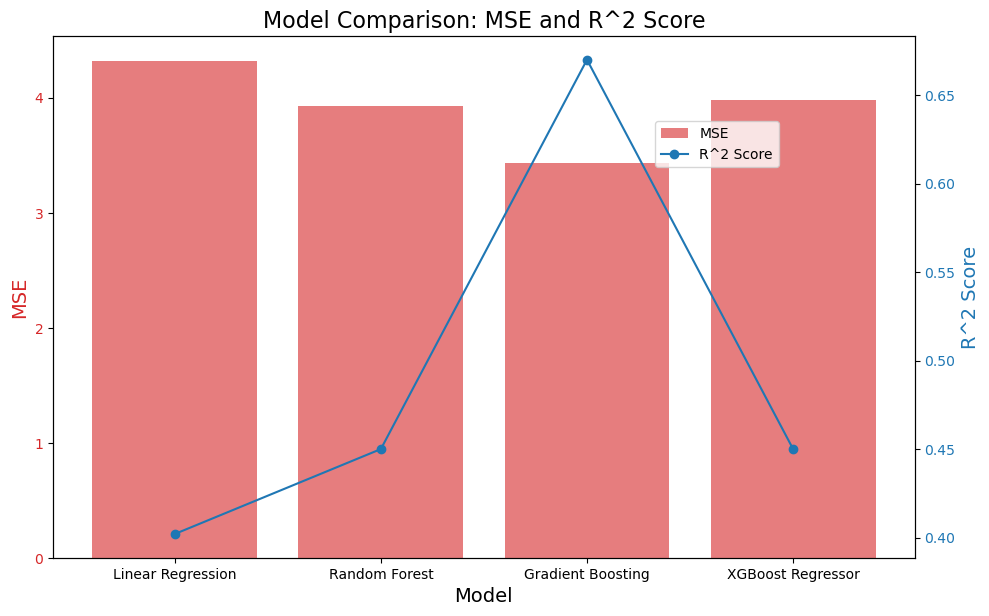

In [59]:
import matplotlib.pyplot as plt

# Assume model_metrics dictionary is filled as per the previous example
model_metrics = {
    "Linear Regression": {"R2":0.402, "MSE": 4.32},
    "Random Forest": {"R2": .45, "MSE": 3.93},
    "Gradient Boosting": {"R2": 0.67, "MSE": 3.43},
    "XGBoost Regressor": {"R2": 0.45, "MSE": 3.98}
}

# Preparing data for plotting
models = list(model_metrics.keys())
r2_scores = [model_metrics[model]["R2"] for model in models]
MSE_scores = [model_metrics[model]["MSE"] for model in models]

# Creating subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for MSE
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('MSE', color='tab:red', fontsize=14)
ax1.bar(models, MSE_scores, color='tab:red', alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('R^2 Score', color='tab:blue', fontsize=14)
ax2.plot(models, r2_scores, color='tab:blue', marker='o', label='R^2 Score')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding titles and layout adjustments
fig.tight_layout()
plt.title('Model Comparison: MSE and R^2 Score', fontsize=16)
fig.legend(loc="upper right", bbox_to_anchor=(0.85,0.85), bbox_transform=ax1.transAxes)

plt.show()
